**Loan Default Classification**

In [1]:
import pandas as pd
import io
import numpy as np                     # For mathematical calculations 
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt        # For plotting graphs
import joblib
%matplotlib inline 
from scipy.special import boxcox1p
import warnings
warnings.filterwarnings('ignore') 

In [2]:
#loan_default train dataset is downloaded into dataframe
train=pd.read_csv("H:/Amar/ML_Artivatic_dataset/train_indessa.csv") 

In [3]:
#loan_default test dataset is downloaded into dataframe
test=pd.read_csv("H:/Amar/ML_Artivatic_dataset/test_indessa.csv")

In [4]:
#data sets copied since the original copy may need in the later steps.
train_original=train.copy() 
test_original=test.copy()

In [5]:
#displayes first 5 records in train
train.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36 months,,19.19,E,E3,clerk,...,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36 months,BAT1586599,7.26,A,A4,Driver,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,...,0.0,NaN,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,...,0.0,NaN,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0,47033.0,0


In [6]:
#displayes first 5 records in test
test.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,11937648,14000,14000,14000.0,60 months,BAT4711174,16.24,C,C5,Data Analyst,...,0.0,0.0,NaN,INDIVIDUAL,NaN,104th week,0.0,0.0,85230.0,45700.0
1,38983318,16000,16000,16000.0,60 months,BAT4318899,9.49,B,B2,Senior Database Administrator,...,0.0,0.0,NaN,INDIVIDUAL,NaN,57th week,0.0,0.0,444991.0,21400.0
2,27999917,11050,11050,11050.0,60 months,BAT446479,15.61,D,D1,Customer service representative,...,0.0,0.0,26.0,INDIVIDUAL,NaN,70th week,0.0,0.0,105737.0,16300.0
3,61514932,35000,35000,34700.0,60 months,BAT4664105,12.69,C,C2,ACCT OFFICER,...,0.0,0.0,NaN,INDIVIDUAL,NaN,22th week,0.0,0.0,287022.0,72400.0
4,59622821,6500,6500,6500.0,36 months,,6.89,A,A3,Paralegal,...,0.0,0.0,NaN,INDIVIDUAL,NaN,22th week,0.0,0.0,234278.0,26700.0


In [7]:
print("The list of columns present in the train Dataset is")
print(train.columns)
print("The list of columns present in the test Dataset is")
print(test.columns)

The list of columns present in the train Dataset is
Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'batch_enrolled', 'int_rate', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'application_type', 'verification_status_joint', 'last_week_pay',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'loan_status'],
      dtype='object')
The list of columns present in the test Dataset is
Index(['member_id', 'loan_amnt', 'funded_amnt', 'fu

In [8]:
print("Number of Rows and Columns in the Train dataset")
print(train.shape)
print("Number of Rows and Columns in the Test dataset")
print(test.shape)

Number of Rows and Columns in the Train dataset
(532428, 45)
Number of Rows and Columns in the Test dataset
(354951, 44)


**Target variable** In this dataset, 44 independent vairable and 1 target variable. i.e loan_status

In [9]:
train['loan_status'].value_counts()

0    406601
1    125827
Name: loan_status, dtype: int64

loan_status consists of binary value, where 0 represents the 406601 defaulters and 1 represents the 125827 non-defaulters. In total recodes 76.36% of records are defaulted

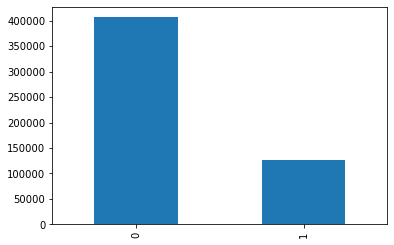

In [10]:
train['loan_status'].value_counts().plot.bar()



**Exploratary Data Analysis** Lets see, how independent variable influnces loan_status so that defaulters rate increased



**Loan amount vs. loan status**

             loan_amnt
loan_status           
0             78.69123
1             21.30877


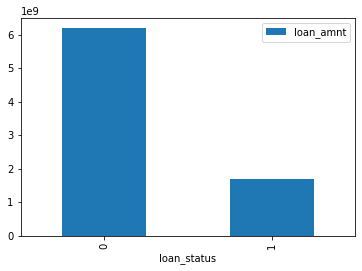

In [11]:
#relation between loan amount and loan status

print(train[['loan_amnt','loan_status']].groupby(by='loan_status').sum()*100/(train['loan_amnt'].sum()))
train[['loan_amnt','loan_status']].groupby(by='loan_status').sum().plot.bar()

#it shows 78.69 % of the loan amount is default

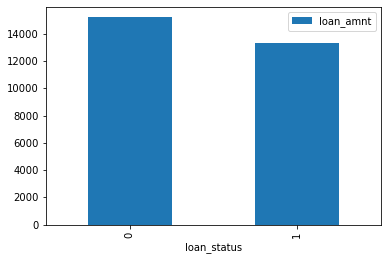

In [12]:
#relation between average loan amount and loan status
train[['loan_amnt','loan_status']].groupby(by='loan_status').mean().plot.bar()

#Loan defaulters apply for larger loans.

**Term vs. loan_status** term variable consists of both numeric and object as value (e.g 36 months). Only numeric value is taken for further processing.

In [13]:
train['term'].unique()

array(['36 months', '60 months'], dtype=object)

In [14]:
#string is removed from the term variable
def encode_term(x):
    return int(x.split(' ')[0])
    
train['term']=train['term'].apply(encode_term)

In [15]:
#Change in test
test['term']=test['term'].apply(encode_term)

In [16]:
train['term'].unique()
#Now only numeric values are present in term

array([36, 60], dtype=int64)

Comparison of loan defaulters rate against the term

term                36         60
loan_status                      
0            66.679620  33.320380
1            80.803802  19.196198


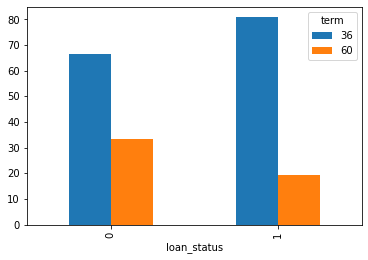

In [17]:
print(pd.crosstab(train['loan_status'],train['term']).apply(lambda r: 100*r/r.sum(), axis=1))
pd.crosstab(train['loan_status'],train['term']).apply(lambda r: 100*r/r.sum(), axis=1).plot.bar()

**Interest rate vs. loan status**

In [18]:
print(train['int_rate'].nunique())
#train['int_rate'].sort_values().unique()

535


interest rate is grouped into 5 category as follows

In [19]:
def encode_interest(x):
    if x>=5.0 and x<10.0:
      return 1
    if x>=10.0 and x<15.0:
      return 2
    if x>=15.0 and x<20.0:
      return 3
    if x>=20.0 and x<25.0:
      return 4
    else:
      return 5
    
train['int_rate']=train['int_rate'].apply(encode_interest)

In [20]:
#change in test 
test['int_rate']=test['int_rate'].apply(encode_interest)

In [21]:
print(train['int_rate'].nunique())
train['int_rate'].sort_values().unique()
#interest rates are grouped into 5 categories 

5


array([1, 2, 3, 4, 5], dtype=int64)

Lets compare the loan_status against int_rate

loan_status          0          1
int_rate                         
1            78.638877  21.361123
2            75.024429  24.975571
3            76.058418  23.941582
4            76.178898  23.821102
5            82.924254  17.075746


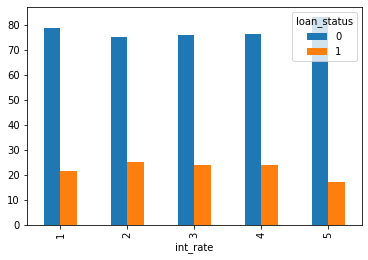

In [22]:
pd.crosstab(train['int_rate'],train['loan_status']).apply(lambda r: 100*r/r.sum(), axis=1).plot.bar()

print(pd.crosstab(train['int_rate'],train['loan_status']).apply(lambda r: 100*r/r.sum(), axis=1))


Defaulters are normally distributed through all categories of int_rate but still, interest greater than 25 has higher defaulters


**Grade vs. loan status**

In [23]:
print(train['grade'].value_counts())
print(train['grade'].nunique())
print(train['grade'].unique())

B    152713
C    147499
A     89107
D     83567
E     42495
F     13826
G      3221
Name: grade, dtype: int64
7
['E' 'B' 'A' 'D' 'C' 'F' 'G']


Lets compare the loan_status against grade

loan_status          0          1
grade                            
A            73.112101  26.887899
B            73.672182  26.327818
C            78.359175  21.640825
D            78.283294  21.716706
E            81.310742  18.689258
F            79.082887  20.917113
G            76.404843  23.595157


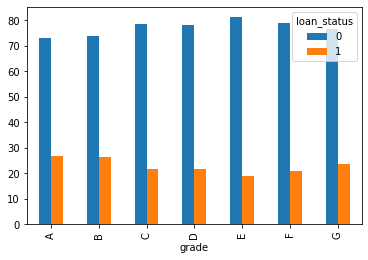

In [24]:
pd.crosstab(train['grade'],train['loan_status']).apply(lambda r: 100*r/r.sum(), axis=1).plot.bar()

print(pd.crosstab(train['grade'],train['loan_status']).apply(lambda r: 100*r/r.sum(), axis=1))


**Employee length vs. loan status**

In [25]:
print("Employment length cateory")
print(train['emp_length'].nunique())
print("Employment length of the Employees ")
print(train['emp_length'].unique())
print(train['emp_length'].value_counts())

Employment length cateory
11
Employment length of the Employees 
['9 years' '< 1 year' '2 years' '10+ years' '5 years' '8 years' '7 years'
 '4 years' nan '1 year' '3 years' '6 years']
10+ years    175105
2 years       47276
< 1 year      42253
3 years       42175
1 year        34202
5 years       33393
4 years       31581
7 years       26680
8 years       26443
6 years       25741
9 years       20688
Name: emp_length, dtype: int64


emp_length consists of both numerical and object data. so that, object value is removed as follows


In [26]:
def encode_emp_length(x):
    if type(x)==float: #Check for nan ,as only Nans are float while other values are str
        return x
    if x=='10+ years':
        return 10
    if x=='< 1 year':
        return 0
    else:
        return int(x.split(' ')[0])
    
train['emp_length']=train['emp_length'].apply(encode_emp_length)

In [27]:
test['emp_length']=test['emp_length'].apply(encode_emp_length)

In [28]:
print("Employment length cateory")
print(train['emp_length'].nunique())
print("Employment length of the Employees ")
print(train['emp_length'].unique())

Employment length cateory
11
Employment length of the Employees 
[ 9.  0.  2. 10.  5.  8.  7.  4. nan  1.  3.  6.]


employee length is converted into numerical value. Lets compare the loan_status against emp_length

loan_status          0          1
emp_length                       
0.0          75.402930  24.597070
1.0          75.048243  24.951757
2.0          74.966156  25.033844
3.0          75.817427  24.182573
4.0          74.225009  25.774991
5.0          73.278831  26.721169
6.0          71.881434  28.118566
7.0          73.995502  26.004498
8.0          77.419355  22.580645
9.0          77.054331  22.945669
10.0         78.058308  21.941692


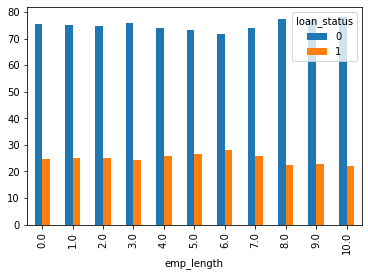

In [29]:
pd.crosstab(train['emp_length'],train['loan_status']).apply(lambda r: 100*r/r.sum(), axis=1).plot.bar()

print(pd.crosstab(train['emp_length'],train['loan_status']).apply(lambda r: 100*r/r.sum(), axis=1))


**Home ownership vs. loan status**

In [30]:
print("Total home_ownership category")
print(train['home_ownership'].nunique())
print("List of home_ownership")
print(train['home_ownership'].unique())
print(train['home_ownership'].value_counts())

Total home_ownership category
6
List of home_ownership
['OWN' 'MORTGAGE' 'RENT' 'OTHER' 'NONE' 'ANY']
MORTGAGE    265940
RENT        213668
OWN          52664
OTHER          117
NONE            36
ANY              3
Name: home_ownership, dtype: int64


In [31]:
#Change OHTER, NONE, ANY to RENT as these data points are too low.
train['home_ownership']=train['home_ownership'].apply(lambda x: 'RENT' if x in ['OTHER','NONE','ANY'] else x)

test['home_ownership']=test['home_ownership'].apply(lambda x: 'RENT' if x in ['OTHER','NONE','ANY'] else x)


In [32]:
print(train['home_ownership'].nunique())
print(train['home_ownership'].unique())
print(train['home_ownership'].value_counts())

3
['OWN' 'MORTGAGE' 'RENT']
MORTGAGE    265940
RENT        213824
OWN          52664
Name: home_ownership, dtype: int64


Lets compare the loan_status against home_ownership

loan_status             0          1
home_ownership                      
MORTGAGE        76.086335  23.913665
OWN             79.251481  20.748519
RENT            76.006435  23.993565


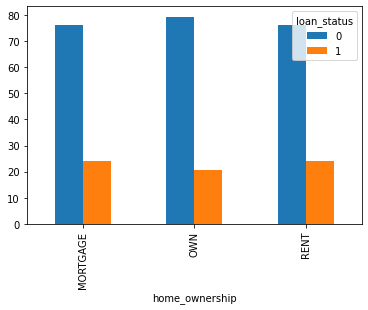

In [33]:
pd.crosstab(train['home_ownership'],train['loan_status']).apply(lambda r: 100*r/r.sum(), axis=1).plot.bar()

print(pd.crosstab(train['home_ownership'],train['loan_status']).apply(lambda r: 100*r/r.sum(), axis=1))



**Verification status vs. loan status**


In [ ]:
print("Types of verification status")
print(train['verification_status'].unique())
print(train['verification_status'].value_counts())

Lets compare loan_status against verification_status

In [ ]:
pd.crosstab(train['verification_status'],train['loan_status']).apply(lambda r: 100*r/r.sum(), axis=1).plot.bar()

print(pd.crosstab(train['verification_status'],train['loan_status']).apply(lambda r: 100*r/r.sum(), axis=1))


**Loan purpose vs. loan status**

In [34]:
train['purpose'].unique()

array(['debt_consolidation', 'home_improvement', 'credit_card', 'other',
       'major_purchase', 'small_business', 'vacation', 'car', 'moving',
       'medical', 'wedding', 'renewable_energy', 'house', 'educational'],
      dtype=object)

Lets compare loan_status against purpose


loan_status                 0          1
purpose                                 
car                 63.273832  36.726168
credit_card         79.383844  20.616156
debt_consolidation  76.816016  23.183984
educational         20.769231  79.230769
home_improvement    75.137517  24.862483
house               61.658986  38.341014
major_purchase      68.154415  31.845585
medical             72.816103  27.183897
moving              69.904409  30.095591
other               72.777951  27.222049
renewable_energy    62.839879  37.160121
small_business      66.742597  33.257403
vacation            72.617354  27.382646
wedding             25.695931  74.304069


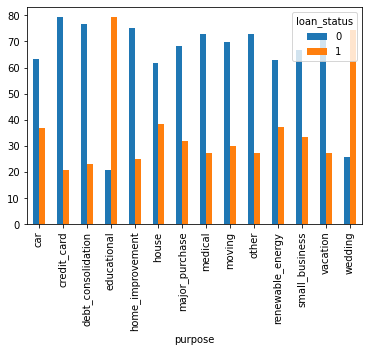

In [35]:
pd.crosstab(train['purpose'],train['loan_status']).apply(lambda r: 100*r/r.sum(), axis=1).plot.bar()

print(pd.crosstab(train['purpose'],train['loan_status']).apply(lambda r: 100*r/r.sum(), axis=1))


## **Data Cleaning**

In [36]:
#temporarily the data sets are stored, since we are going to change values 
train1=train.copy()
test1=test.copy()

**Dropping Columns:**
funded_amnt, funded_amnt_inv are to be considered after loan approval. To predict new applicant is defaulter or not future oriented vairables are not needed. so these columns are droped and also following columns are dropped.

In [37]:
train.columns

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'batch_enrolled', 'int_rate', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'application_type', 'verification_status_joint', 'last_week_pay',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'loan_status'],
      dtype='object')

In [46]:
# Drop any column with more than 50% missing values
train = train.dropna(thresh=(len(train)/2),axis=1)

test = test.dropna(thresh=(len(test)/2),axis=1)

train.drop(['member_id','funded_amnt','funded_amnt_inv','batch_enrolled','sub_grade'],axis=1,inplace=True)

test.drop(['member_id','funded_amnt','funded_amnt_inv','batch_enrolled','sub_grade'],axis=1,inplace=True)

train.drop(['pymnt_plan','last_week_pay','application_type','zip_code'],axis=1,inplace=True)

test.drop(['pymnt_plan','last_week_pay','application_type','zip_code'],axis=1,inplace=True)

train.drop(['emp_title','title'],axis=1,inplace=True)

test.drop(['emp_title','title'],axis=1,inplace=True)


In [44]:
train.drop(['total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee'],axis=1,inplace=True)

test.drop(['total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee'],axis=1,inplace=True)


In [41]:
train.columns
#shows that the above mentioned columns are dropped

Index(['loan_amnt', 'term', 'int_rate', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'collections_12_mths_ex_med', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'loan_status'],
      dtype='object')

**Filing Missing Values:** All the missing values are filled with mean, mode, median values


In [47]:
#Shows the number of values present in each columns
train.isnull().sum()

loan_amnt                         0
term                              0
int_rate                          0
grade                             0
emp_length                    26891
home_ownership                    0
annual_inc                        3
verification_status               0
purpose                           0
addr_state                        0
dti                               0
delinq_2yrs                      16
inq_last_6mths                   16
open_acc                         16
pub_rec                          16
revol_bal                         0
revol_util                      287
total_acc                        16
initial_list_status               0
collections_12_mths_ex_med       95
acc_now_delinq                   16
tot_coll_amt                  42004
tot_cur_bal                   42004
total_rev_hi_lim              42004
loan_status                       0
dtype: int64

In [48]:
#Shows the number of values present in each columns
test.isnull().sum()

loan_amnt                         0
term                              0
int_rate                          0
grade                             0
emp_length                    17934
home_ownership                    0
annual_inc                        1
verification_status               0
purpose                           0
addr_state                        0
dti                               0
delinq_2yrs                      13
inq_last_6mths                   13
open_acc                         13
pub_rec                          13
revol_bal                         0
revol_util                      215
total_acc                        13
initial_list_status               0
collections_12_mths_ex_med       50
acc_now_delinq                   13
tot_coll_amt                  28272
tot_cur_bal                   28272
total_rev_hi_lim              28272
dtype: int64

In [49]:

train['emp_length'].fillna(train['emp_length'].mode()[0], inplace=True)

test['emp_length'].fillna(test['emp_length'].mode()[0], inplace=True)


train['revol_util'].fillna(train['revol_util'].mean(), inplace=True)

test['revol_util'].fillna(test['revol_util'].mean(), inplace=True)

train['tot_coll_amt'].fillna(train['tot_coll_amt'].mode()[0], inplace=True)

test['tot_coll_amt'].fillna(test['tot_coll_amt'].mode()[0], inplace=True)

train['tot_cur_bal'].fillna(train['tot_cur_bal'].mean(), inplace=True)

test['tot_cur_bal'].fillna(test['tot_cur_bal'].mean(), inplace=True)

train['total_rev_hi_lim'].fillna(train['total_rev_hi_lim'].median(), inplace=True)

test['total_rev_hi_lim'].fillna(test['total_rev_hi_lim'].median(), inplace=True)

train['collections_12_mths_ex_med'].fillna(train['collections_12_mths_ex_med'].median(), inplace=True)

test['collections_12_mths_ex_med'].fillna(test['collections_12_mths_ex_med'].median(), inplace=True)

train['annual_inc'].fillna(train['annual_inc'].median(), inplace=True)

test['annual_inc'].fillna(test['annual_inc'].median(), inplace=True)

train['delinq_2yrs'].fillna(train['delinq_2yrs'].median(), inplace=True)

test['delinq_2yrs'].fillna(test['delinq_2yrs'].median(), inplace=True)

train['inq_last_6mths'].fillna(train['inq_last_6mths'].median(), inplace=True)

test['inq_last_6mths'].fillna(test['inq_last_6mths'].median(), inplace=True)

train['open_acc'].fillna(train['open_acc'].median(), inplace=True)

test['open_acc'].fillna(test['open_acc'].median(), inplace=True)

train['pub_rec'].fillna(train['pub_rec'].median(), inplace=True)

test['pub_rec'].fillna(test['pub_rec'].median(), inplace=True)

train['total_acc'].fillna(train['total_acc'].median(), inplace=True)

test['total_acc'].fillna(test['total_acc'].median(), inplace=True)

train['acc_now_delinq'].fillna(train['acc_now_delinq'].median(), inplace=True)

test['acc_now_delinq'].fillna(test['acc_now_delinq'].median(), inplace=True)



In [50]:
train.isnull().sum()
#shows that all the null values are filled

loan_amnt                     0
term                          0
int_rate                      0
grade                         0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
purpose                       0
addr_state                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
collections_12_mths_ex_med    0
acc_now_delinq                0
tot_coll_amt                  0
tot_cur_bal                   0
total_rev_hi_lim              0
loan_status                   0
dtype: int64

**Create dummy variables for categorical columns**

In [51]:
#Create dummy variables for categorical columns
cat_cols=['home_ownership','verification_status','initial_list_status']
for col in cat_cols:
    train=train.join(pd.get_dummies(train[col],drop_first=True))
train.drop(cat_cols,axis=1,inplace=True)

#Create dummy variables for categorical columns
cat_cols=['home_ownership','verification_status','initial_list_status']
for col in cat_cols:
    test=test.join(pd.get_dummies(test[col],drop_first=True))
test.drop(cat_cols,axis=1,inplace=True)



**Create dummy variables for object columns using label encoder**

In [52]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
train['grade']= label_encoder.fit_transform(train['grade'])
train['purpose']= label_encoder.fit_transform(train['purpose'])
train['addr_state']= label_encoder.fit_transform(train['addr_state'])

test['grade']= label_encoder.fit_transform(test['grade'])
test['purpose']= label_encoder.fit_transform(test['purpose'])
test['addr_state']= label_encoder.fit_transform(test['addr_state'])

  

In [53]:
#Processed data stored in temporary 
train2=train.copy()
test2=test.copy()

In [174]:
train=train2.copy()
test=test2.copy()

## **Data Transformation**

**Outliers** Outliers are detected using skew function as follows. If the skew is not between -1 to +1 then it is considered as outliers values

outlier detection for annual_inc


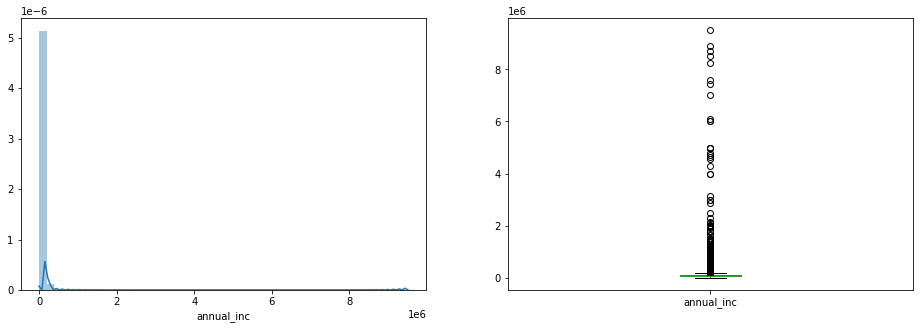

In [175]:
print("outlier detection for annual_inc")
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['annual_inc']) 
plt.subplot(122) 
train['annual_inc'].plot.box(figsize=(16,5)) 
plt.show()

In [176]:
print(train['annual_inc'].skew())
print(test['annual_inc'].skew())

44.776335643422435
43.98946865278573


Before log transform, the skew value is 44.776  and 43.989 for train and test respectively which shows that there is outliers

In [177]:
train["annual_inc"] = train["annual_inc"].map(lambda i: np.log(i) if i > 0 else 0) 
print(train['annual_inc'].skew())


0.21213391237628687


In [178]:
test["annual_inc"] = test["annual_inc"].map(lambda i: np.log(i) if i > 0 else 0)
print(test['annual_inc'].skew())

0.15847735037710278


After the log transform, the skew value is between -1 to +1, hence the outliers are handled. same procedure is followed for all the columns

after log transform


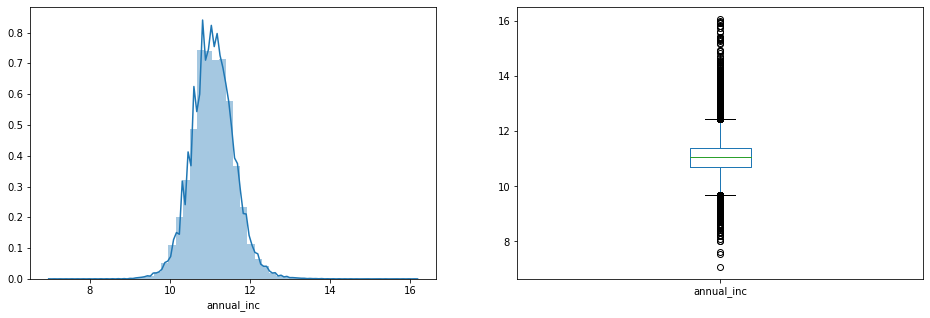

In [179]:
print("after log transform")
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['annual_inc']) 
plt.subplot(122) 
train['annual_inc'].plot.box(figsize=(16,5)) 
plt.show()

In [180]:
print(train['loan_amnt'].skew())
print(test['loan_amnt'].skew())

0.681240301625289
0.6823506790002728


In [181]:
print(train['delinq_2yrs'].skew())
print(test['delinq_2yrs'].skew())

5.373390129655151
5.621603526092511


In [184]:
train["delinq_2yrs"] = train["delinq_2yrs"].map(lambda i: np.log(i) if i > 0 else 0) 
print(train['delinq_2yrs'].skew())

0.376472448843127


In [185]:
test["delinq_2yrs"] = test["delinq_2yrs"].map(lambda i: np.log(i) if i > 0 else 0) 
print(test['delinq_2yrs'].skew())

0.44115239391993954


In [186]:
print(train['int_rate'].skew())
print(test['int_rate'].skew())

0.490831580461498
0.49899293183931126


In [187]:
print(train['purpose'].skew())
print(test['purpose'].skew())

2.472646469180541
2.45299628779018


In [188]:
train["purpose"] = train["purpose"].map(lambda i: np.log(i) if i > 0 else 0) 
print(train['purpose'].skew())

1.101645881820408


In [189]:
test["purpose"] = test["purpose"].map(lambda i: np.log(i) if i > 0 else 0) 
print(test['purpose'].skew())

1.0969967995022731


In [190]:
print(train['inq_last_6mths'].skew())
print(test['inq_last_6mths'].skew())

2.0343748749182105
2.2183753299881905


In [193]:
train["inq_last_6mths"] = train["inq_last_6mths"].map(lambda i: np.log(i) if i > 0 else 0) 
print(train['inq_last_6mths'].skew())

-1.0737182400210534


In [194]:
test["inq_last_6mths"] = test["inq_last_6mths"].map(lambda i: np.log(i) if i > 0 else 0) 
print(test['inq_last_6mths'].skew())

-1.0438613798441694


In [196]:
print(train['pub_rec'].skew())
print(test['pub_rec'].skew())

15.318404463982228
10.10732588083377


In [198]:
train["pub_rec"] = train["pub_rec"].map(lambda i: np.log(i) if i > 0 else 0) 
print(train['pub_rec'].skew())

-1.642212688343645


In [200]:
test["pub_rec"] = test["pub_rec"].map(lambda i: np.log(i) if i > 0 else 0) 
print(test['pub_rec'].skew())

-1.4785271293925915


In [201]:
print(train['revol_bal'].skew())
print(test['revol_bal'].skew())

15.98021197176717
15.903056617487701


In [202]:
train["revol_bal"] = train["revol_bal"].map(lambda i: np.log(i) if i > 0 else 0) 
print(train['revol_bal'].skew())

-2.607711138828537


In [203]:
test["revol_bal"] = test["revol_bal"].map(lambda i: np.log(i) if i > 0 else 0) 
print(test['revol_bal'].skew())

-2.628054853473467


In [221]:
print(train['tot_cur_bal'].skew())
print(test['tot_cur_bal'].skew())

3.138080512287113
2.8941887344578068


In [222]:
train["tot_cur_bal"] = train["tot_cur_bal"].map(lambda i: np.log(i) if i > 0 else 0) 
print(train['tot_cur_bal'].skew())

-0.651457985665779


In [223]:
test["tot_cur_bal"] = test["tot_cur_bal"].map(lambda i: np.log(i) if i > 0 else 0) 
print(test['tot_cur_bal'].skew())

-0.6431135484837623


In [228]:
print(train['total_rev_hi_lim'].skew())
print(test['total_rev_hi_lim'].skew())

80.22190359162674
68.07371548924732


In [229]:
train["total_rev_hi_lim"] = train["total_rev_hi_lim"].map(lambda i: np.log(i) if i > 0 else 0) 
print(train['total_rev_hi_lim'].skew())

-0.7866143006574323


In [230]:
test["total_rev_hi_lim"] = test["total_rev_hi_lim"].map(lambda i: np.log(i) if i > 0 else 0) 
print(test['total_rev_hi_lim'].skew())

-0.8687022587596586


collections_12_mths_ex_med, tot_coll_amt, acc_now_delinq have outliers though log transform is applied. so dropped

In [231]:
train.drop(['collections_12_mths_ex_med','tot_coll_amt','acc_now_delinq'],axis=1,inplace=True)
test.drop(['collections_12_mths_ex_med','tot_coll_amt','acc_now_delinq'],axis=1,inplace=True)

In [232]:
train.shape

(532428, 24)

In [233]:
test.shape

(354951, 23)

In [234]:
train.head()

,loan_amnt,term,int_rate,grade,emp_length,annual_inc,purpose,addr_state,dti,delinq_2yrs,...,revol_util,total_acc,tot_cur_bal,total_rev_hi_lim,loan_status,OWN,RENT,Source Verified,Verified,w
0,14350,36,3,4,9.0,10.264652,0.693147,9,33.88,0.0,...,73.1,28.0,10.264618,10.335270,0,1,0,1,0,0
1,4800,36,2,1,0.0,11.082143,1.386294,20,3.64,0.0,...,23.2,13.0,9.207737,10.401228,0,0,0,1,0,1
2,10000,36,1,0,2.0,10.714418,0.693147,35,18.42,0.0,...,31.2,19.0,10.553075,10.460242,0,1,0,0,0,1
3,15000,36,3,3,10.0,11.561716,0.693147,45,14.97,0.0,...,55.5,21.0,10.925291,10.114559,0,0,1,0,0,0
4,16000,36,2,1,10.0,10.858999,0.000000,4,20.16,0.0,...,76.2,27.0,10.761280,10.758605,0,0,1,0,1,1


In [235]:
test.head()

,loan_amnt,term,int_rate,grade,emp_length,annual_inc,purpose,addr_state,dti,delinq_2yrs,...,revol_bal,revol_util,total_acc,tot_cur_bal,total_rev_hi_lim,OWN,RENT,Source Verified,Verified,w
0,14000,60,3,2,4.0,11.205041,0.000000,35,28.65,0.0,...,10.303203,65.3,53.0,11.353109,10.729854,0,1,1,0,0
1,16000,60,1,1,5.0,11.561716,1.791759,27,31.19,0.0,...,8.333511,19.4,63.0,13.005809,9.971146,0,0,1,0,1
2,11050,60,3,3,10.0,11.039717,0.693147,16,21.73,0.0,...,9.397981,74.0,20.0,11.568710,9.698920,0,1,0,0,1
3,35000,60,2,2,10.0,11.918391,0.693147,4,17.27,0.0,...,10.390502,45.0,26.0,12.567314,11.189962,1,0,1,0,0
4,6500,36,1,0,5.0,10.858999,1.791759,18,20.19,0.0,...,8.543446,19.2,36.0,12.364264,10.192419,0,0,0,0,1


## **Modeling**

In [236]:
target=train['loan_status']

In [237]:
data=train.copy()

data.drop(['loan_status'],axis=1,inplace=True)

In [240]:
data.shape

(532428, 23)

In [239]:
data.head()

,loan_amnt,term,int_rate,grade,emp_length,annual_inc,purpose,addr_state,dti,delinq_2yrs,...,revol_bal,revol_util,total_acc,tot_cur_bal,total_rev_hi_lim,OWN,RENT,Source Verified,Verified,w
0,14350,36,3,4,9.0,10.264652,0.693147,9,33.88,0.0,...,10.021937,73.1,28.0,10.264618,10.335270,1,0,1,0,0
1,4800,36,2,1,0.0,11.082143,1.386294,20,3.64,0.0,...,8.939056,23.2,13.0,9.207737,10.401228,0,0,1,0,1
2,10000,36,1,0,2.0,10.714418,0.693147,35,18.42,0.0,...,9.294406,31.2,19.0,10.553075,10.460242,1,0,0,0,1
3,15000,36,3,3,10.0,11.561716,0.693147,45,14.97,0.0,...,9.526027,55.5,21.0,10.925291,10.114559,0,1,0,0,0
4,16000,36,2,1,10.0,10.858999,0.000000,4,20.16,0.0,...,10.486680,76.2,27.0,10.761280,10.758605,0,1,0,1,1


**Logistics Regression**

In [241]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score,confusion_matrix,classification_report
from sklearn.model_selection import learning_curve,StratifiedKFold


In [243]:
#training and testing data split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, stratify=target,random_state=42)

In [244]:
#training
clf = LogisticRegression(random_state=0,penalty='l2').fit(X_train, y_train)

In [245]:
y_pred=clf.predict(X_test)

In [246]:
clf.predict_proba(X_test)

array([[0.77267175, 0.22732825],
       [0.73746433, 0.26253567],
       [0.8122704 , 0.1877296 ],
       ...,
       [0.87422099, 0.12577901],
       [0.64304708, 0.35695292],
       [0.88708012, 0.11291988]])

In [247]:
#Accuracy on test split
clf.score(X_test, y_test)

0.7637999361418403

In [248]:
#Accracy on train split
clf.score(X_train, y_train)

0.7636250944964338

In [249]:
target_names = ['Loan_status_Yes', 'Loan_status_No']
print(classification_report(y_test, y_pred, target_names=target_names))

                 precision    recall  f1-score   support

Loan_status_Yes       0.76      1.00      0.87     81321
 Loan_status_No       0.56      0.00      0.00     25165

       accuracy                           0.76    106486
      macro avg       0.66      0.50      0.44    106486
   weighted avg       0.72      0.76      0.66    106486



In [250]:
print('ROC-AUC:',round(roc_auc_score(y_test,y_pred),4))

ROC-AUC: 0.5009


Copying results into output.csv which contains member_id and predicted label_status

In [251]:
df_output=pd.DataFrame()


In [252]:
df_output['member_id']=test_original['member_id']


In [253]:
output=clf.predict(test).astype(int)


In [260]:
df_output['loan_status'] = np.vectorize(lambda s: 1 if s==1 else 0)(output)


In [263]:
df_output[['member_id','loan_status']].to_csv('output.csv',index=False)

**RandomForest**

In [264]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

#from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, stratify=target,random_state=42)

In [265]:
clf = RandomForestClassifier(n_estimators=500, max_depth=5,random_state=0,criterion='entropy',)

In [266]:
clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=500,
                       random_state=0)

In [267]:
y_pred=clf.predict(X_test)

In [268]:
clf.score(X_test, y_test)

0.8088105478654471

In [269]:
clf.score(X_train, y_train)

0.8078752506209765

In [270]:
clf.predict_proba(X_test)

array([[0.75422271, 0.24577729],
       [0.77066974, 0.22933026],
       [0.84057069, 0.15942931],
       ...,
       [0.78147721, 0.21852279],
       [0.8297866 , 0.1702134 ],
       [0.82743802, 0.17256198]])

In [271]:
target_names = ['Loan_status_Yes', 'Loan_status_No']
print(classification_report(y_test, y_pred, target_names=target_names))

                 precision    recall  f1-score   support

Loan_status_Yes       0.80      0.99      0.89     81321
 Loan_status_No       0.87      0.22      0.36     25165

       accuracy                           0.81    106486
      macro avg       0.84      0.61      0.62    106486
   weighted avg       0.82      0.81      0.76    106486



In [272]:
print('ROC-AUC:',round(roc_auc_score(y_test,y_pred),4))

ROC-AUC: 0.6066


Text(33.0, 0.5, 'Predicted Label')

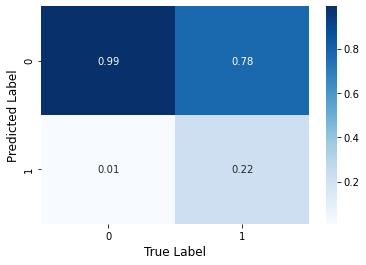

In [279]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred).T
cm = cm.astype('float')/cm.sum(axis=0)
ax = sns.heatmap(cm, annot=True, cmap='Blues');
ax.set_xlabel('True Label',size=12)
ax.set_ylabel('Predicted Label',size=12)

In [277]:
df_output1=pd.DataFrame()
df_output1['member_id']=test_original['member_id']
output1=clf.predict(test).astype(int)
df_output1['loan_status'] = np.vectorize(lambda s: 1 if s==1 else 0)(output1)

df_output1[['member_id','loan_status']].to_csv('output1.csv',index=False)

**DecisionTreeCLassifier**


In [280]:
from sklearn import tree

In [281]:
clf = tree.DecisionTreeClassifier()

In [282]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [283]:
y_pred=clf.predict(X_test)

In [284]:
clf.predict_proba(X_test)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [285]:
clf.score(X_test, y_test)

0.7134083353680296

In [286]:
clf.score(X_train, y_train)

1.0

In [287]:
target_names = ['Loan_status_Yes', 'Loan_status_No']
print(classification_report(y_test, y_pred, target_names=target_names))

                 precision    recall  f1-score   support

Loan_status_Yes       0.82      0.80      0.81     81321
 Loan_status_No       0.40      0.42      0.41     25165

       accuracy                           0.71    106486
      macro avg       0.61      0.61      0.61    106486
   weighted avg       0.72      0.71      0.72    106486



In [288]:
print('ROC-AUC:',round(roc_auc_score(y_test,y_pred),4))

ROC-AUC: 0.6134


Text(33.0, 0.5, 'Predicted Label')

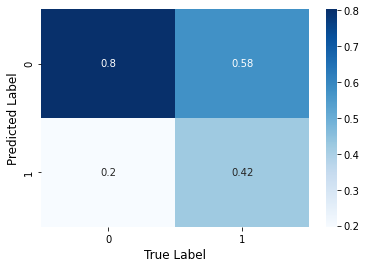

In [289]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred).T
cm = cm.astype('float')/cm.sum(axis=0)
ax = sns.heatmap(cm, annot=True, cmap='Blues');
ax.set_xlabel('True Label',size=12)
ax.set_ylabel('Predicted Label',size=12)

In [290]:
df_output2=pd.DataFrame()
df_output2['member_id']=test_original['member_id']
output2=clf.predict(test).astype(int)
df_output2['loan_status'] = np.vectorize(lambda s: 1 if s==1 else 0)(output2)

df_output2[['member_id','loan_status']].to_csv('output2.csv',index=False)

**MLP**

In [292]:
from sklearn.neural_network import MLPClassifier

In [293]:
from sklearn.datasets import make_classification

In [294]:
from sklearn.model_selection import train_test_split

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(data, target, stratify=target,random_state=1)

In [295]:
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)

In [296]:
#clf.predict(X_test)
y_pred=clf.predict(X_test)

In [297]:
clf.score(X_test, y_test)

0.7792104126364029

In [298]:
clf.score(X_train, y_train)

0.7797517032835456

In [299]:
clf.predict_proba(X_test)

array([[0.75073448, 0.24926552],
       [0.78850931, 0.21149069],
       [0.86875519, 0.13124481],
       ...,
       [0.81523923, 0.18476077],
       [0.874514  , 0.125486  ],
       [0.86789167, 0.13210833]])

In [300]:
target_names = ['Loan_status_Yes', 'Loan_status_No']
print(classification_report(y_test, y_pred, target_names=target_names))

                 precision    recall  f1-score   support

Loan_status_Yes       0.79      0.97      0.87     81321
 Loan_status_No       0.62      0.17      0.27     25165

       accuracy                           0.78    106486
      macro avg       0.71      0.57      0.57    106486
   weighted avg       0.75      0.78      0.73    106486



In [301]:
print('ROC-AUC:',round(roc_auc_score(y_test,y_pred),4))

ROC-AUC: 0.5685


Text(33.0, 0.5, 'Predicted Label')

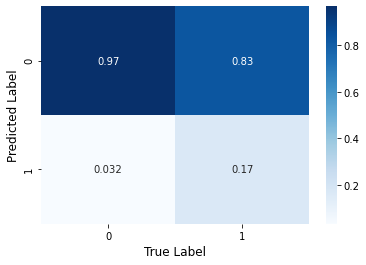

In [302]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred).T
cm = cm.astype('float')/cm.sum(axis=0)
ax = sns.heatmap(cm, annot=True, cmap='Blues');
ax.set_xlabel('True Label',size=12)
ax.set_ylabel('Predicted Label',size=12)

In [303]:
df_output3=pd.DataFrame()
df_output3['member_id']=test_original['member_id']
output3=clf.predict(test).astype(int)
df_output3['loan_status'] = np.vectorize(lambda s: 1 if s==1 else 0)(output3)

df_output3[['member_id','loan_status']].to_csv('output3.csv',index=False)